# Análisis Exploratorio de Datos (EDA) para el Proyecto de Recomendación de Juegos en Steam

En este EDA, exploraremos y visualizaremos conjuntos de datos relacionados con nuestro proyecto de recomendación de juegos en Steam. Utilizaremos visualizaciones y estadísticas para comprender los datos y tomar decisiones informadas. Exploraremos usuarios, juegos, reseñas, géneros y más para obtener información valiosa.

¡Comencemos nuestro viaje de exploración en el mundo de los videojuegos en Steam!


[![2.jpg](https://i.postimg.cc/HnJcFjF3/2.jpg)](https://postimg.cc/5QV2C94F)

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [63]:
df = pd.read_csv("/home/davidgonzalez/Documentos/Propios_github/Steam_FastAPI/new_users_item.csv")
df1 = pd.read_csv("/home/davidgonzalez/Documentos/Propios_github/Steam_FastAPI/new_users_reviews.csv")
df2 = pd.read_csv("/home/davidgonzalez/Documentos/Propios_github/Steam_FastAPI/new_steam_games.csv")

In [10]:
df.head(3)

,user_id,user_url,items_count,item_id,item_name,playtime_forever
0,phrostb,http://steamcommunity.com/id/phrostb,7762,286080,Thinking with Time Machine,7
1,sneak4919,http://steamcommunity.com/id/sneak4919,224,4560,Company of Heroes,0
2,phazeback,http://steamcommunity.com/id/phazeback,185,204560,Confrontation,3


In [11]:
df.shape

(40000, 6)

In [12]:
df.columns

Index(['user_id', 'user_url', 'items_count', 'item_id', 'item_name',
       'playtime_forever'],
      dtype='object')

In [13]:
df.dtypes

user_id             object
user_url            object
items_count          int64
item_id              int64
item_name           object
playtime_forever     int64
dtype: object

In [14]:
df.describe()

,items_count,item_id,playtime_forever
count,40000.000000,40000.000000,40000.000000
mean,313.471200,179485.106200,1004.428075
std,689.340542,131825.461785,5346.109263
min,1.000000,10.000000,0.000000
25%,72.000000,34870.000000,0.000000
50%,138.000000,214770.000000,34.000000
75%,276.000000,268220.000000,358.000000
max,7762.000000,527340.000000,388621.000000


In [15]:
df.isnull().sum()

user_id             0
user_url            0
items_count         0
item_id             0
item_name           0
playtime_forever    0
dtype: int64

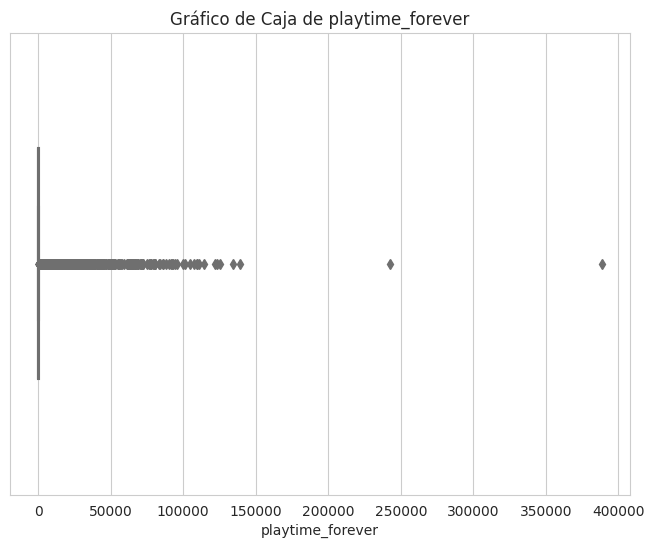

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de caja para 'playtime_forever' en el DataFrame df
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['playtime_forever'], orient='vertical', width=0.5, color='skyblue')
plt.title('Gráfico de Caja de playtime_forever')
plt.xlabel('playtime_forever')
plt.show()


## Gráfico de Dispersión (Scatter Plot)

Otra forma de identificar outliers es mediante un gráfico de dispersión.


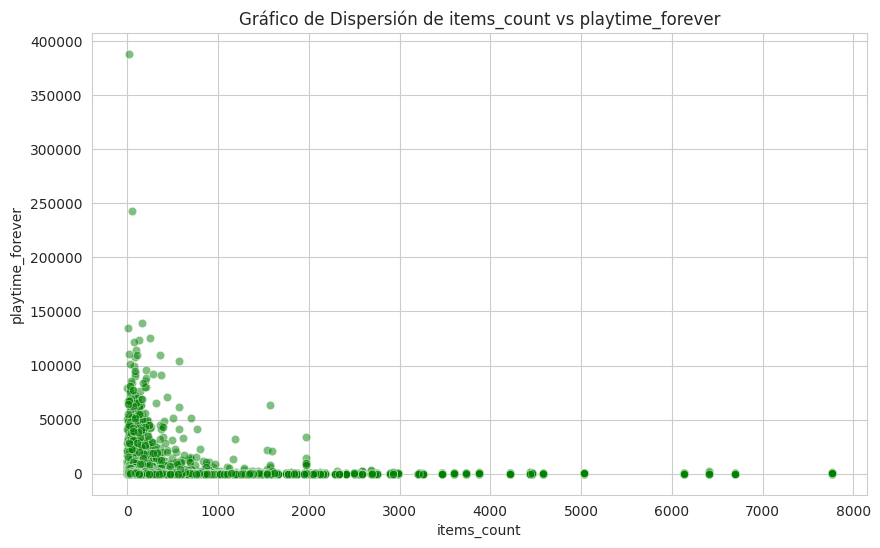

In [72]:
# Gráfico de dispersión de 'items_count' vs 'playtime_forever'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='items_count', y='playtime_forever', color='green', alpha=0.5)
plt.title('Gráfico de Dispersión de items_count vs playtime_forever')
plt.xlabel('items_count')
plt.ylabel('playtime_forever')
plt.show()


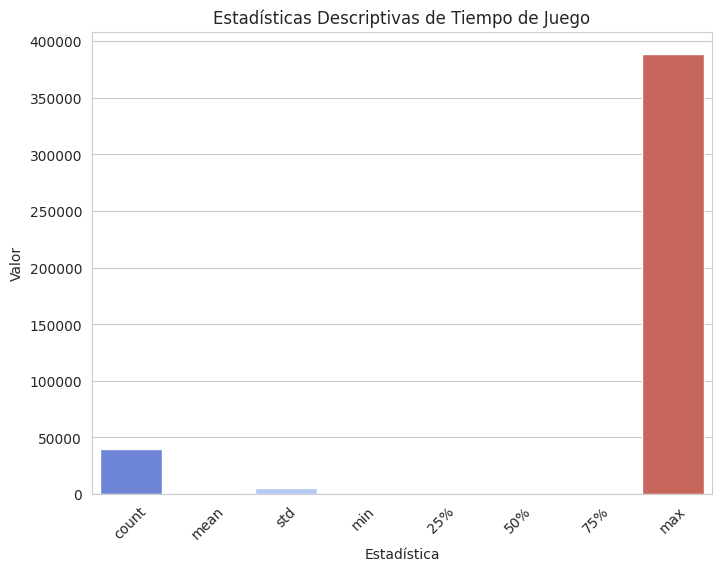

count     40000.000000
mean       1004.428075
std        5346.109263
min           0.000000
25%           0.000000
50%          34.000000
75%         358.000000
max      388621.000000
Name: playtime_forever, dtype: float64


In [52]:
# Calcular estadísticas descriptivas de la columna 'playtime_forever' en el DataFrame df
playtime_stats = df['playtime_forever'].describe()

# Crear un gráfico de barras para visualizar las estadísticas
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
sns.barplot(x=playtime_stats.index, y=playtime_stats.values, palette='coolwarm')
plt.title('Estadísticas Descriptivas de Tiempo de Juego')
plt.ylabel('Valor')
plt.xlabel('Estadística')
plt.xticks(rotation=45)
plt.show()

# Mostrar las estadísticas descriptivas en formato tabular
print(playtime_stats)





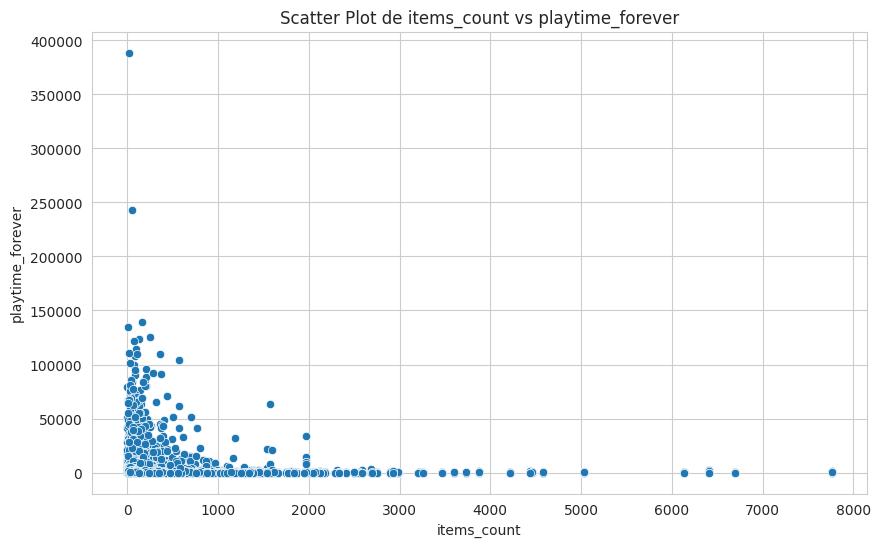

In [64]:
# Scatter plot de items_count vs playtime_forever
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='items_count', y='playtime_forever')
plt.title('Scatter Plot de items_count vs playtime_forever')
plt.xlabel('items_count')
plt.ylabel('playtime_forever')
plt.show()


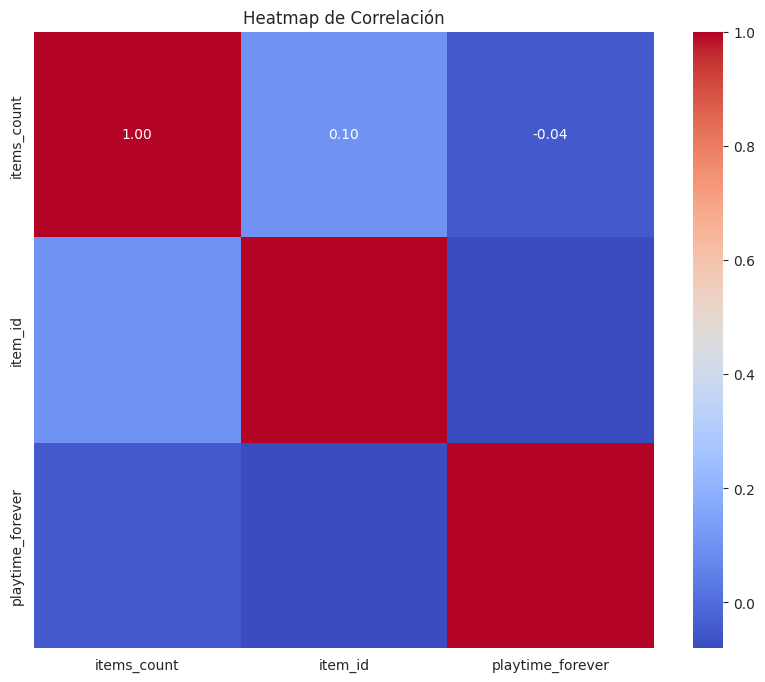

In [70]:
# Seleccionar las columnas numéricas del DataFrame df
numeric_columns = df[['items_count', 'item_id', 'playtime_forever']]

# Calcular la matriz de correlación
correlation_matrix = numeric_columns.corr()

# Crear un heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap de Correlación')
plt.show()


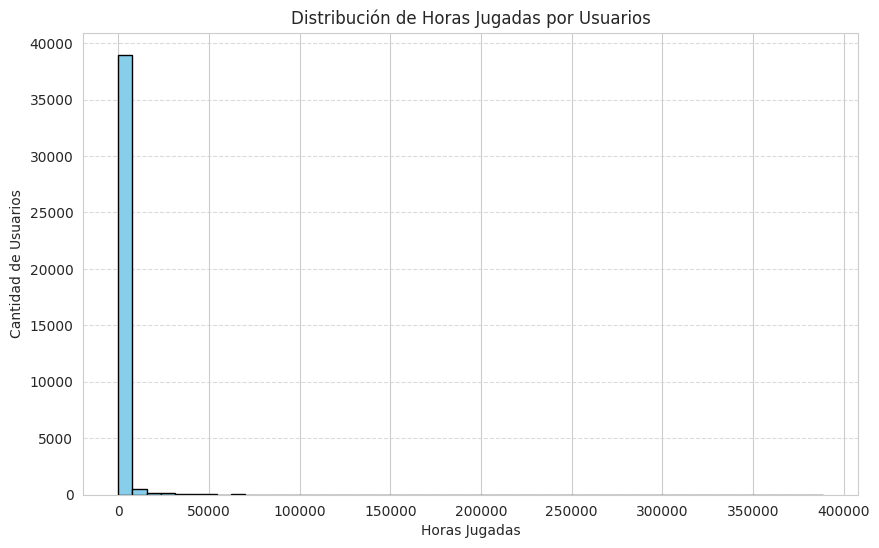

In [75]:
# Crear un histograma de las horas jugadas
plt.figure(figsize=(10, 6))
plt.hist(df['playtime_forever'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribución de Horas Jugadas por Usuarios')
plt.xlabel('Horas Jugadas')
plt.ylabel('Cantidad de Usuarios')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


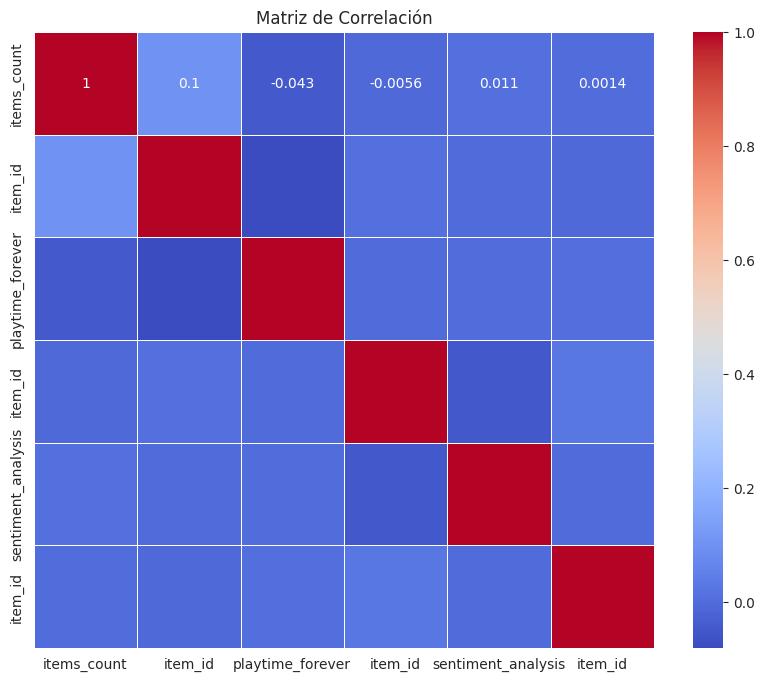

In [68]:
# Supongamos que tienes tres DataFrames llamados df, df1 y df2
# Concatena los DataFrames si es necesario para obtener todas las variables numéricas en uno solo

# Selecciona las columnas numéricas relevantes de cada DataFrame
df_numeric = df[['items_count', 'item_id', 'playtime_forever']]
df1_numeric = df1[['item_id', 'sentiment_analysis']]
df2_numeric = df2[['item_id']]

# Combina los DataFrames con las columnas numéricas
combined_df = pd.concat([df_numeric, df1_numeric, df2_numeric], axis=1)

# Calcular la matriz de correlación
correlation_matrix = combined_df.corr()

# Crear un mapa de calor de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()



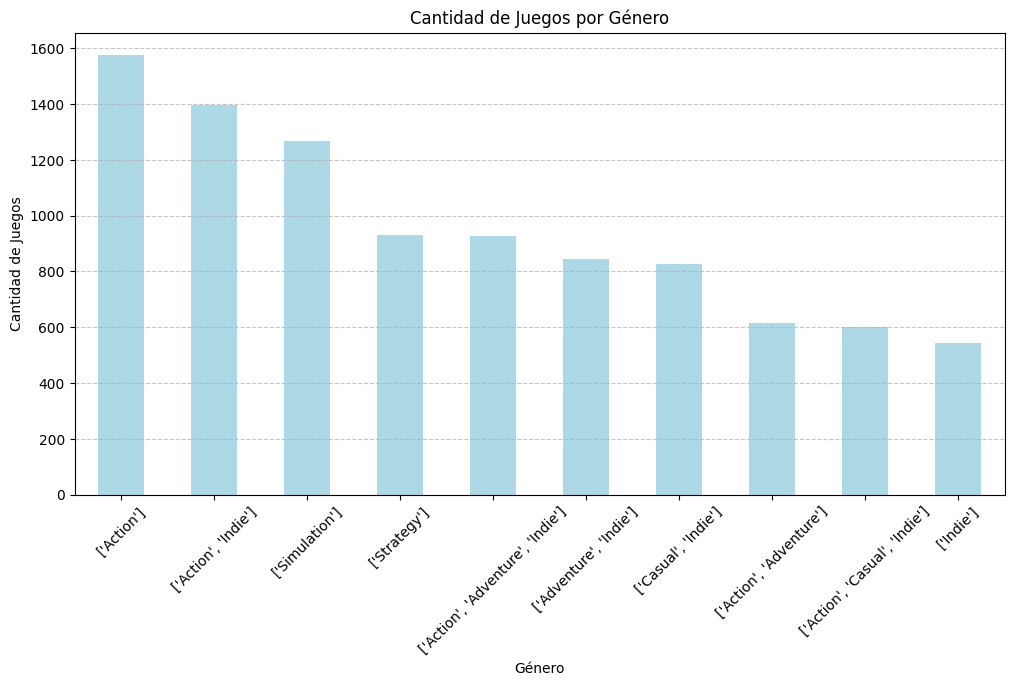

In [18]:
# Contar la cantidad de juegos por género
genre_counts = df2['genres'].value_counts().head(10)

# Crear un gráfico de barras
plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar', color='lightblue')
plt.title('Cantidad de Juegos por Género')
plt.xlabel('Género')
plt.ylabel('Cantidad de Juegos')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


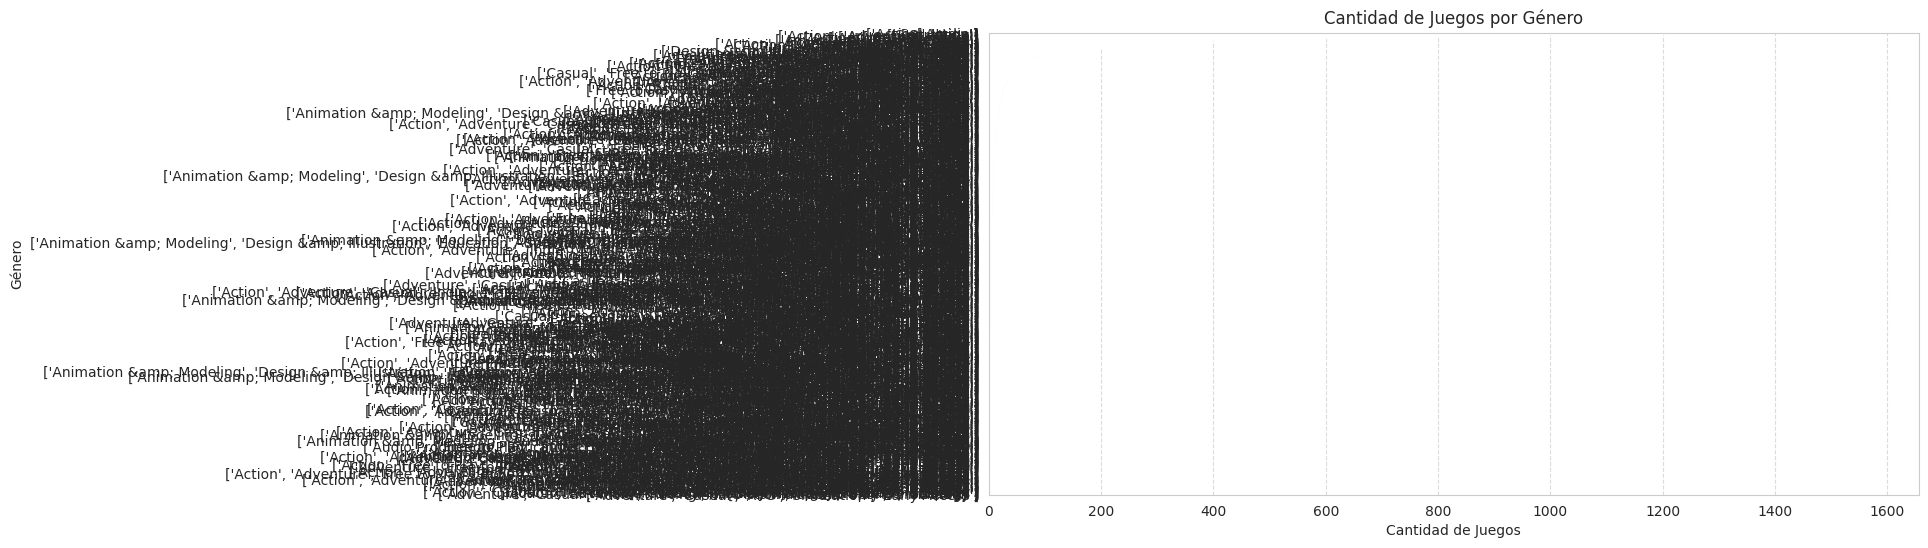

In [53]:
# Crear un gráfico de barras para contar juegos por género
plt.figure(figsize=(12, 6))
genre_order = df2['genres'].value_counts().index
df2['genres'] = pd.Categorical(df2['genres'], categories=genre_order, ordered=True)
sns.countplot(data=df2, y='genres', order=genre_order, palette='viridis')
plt.title('Cantidad de Juegos por Género')
plt.xlabel('Cantidad de Juegos')
plt.ylabel('Género')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()



<Figure size 1200x600 with 0 Axes>

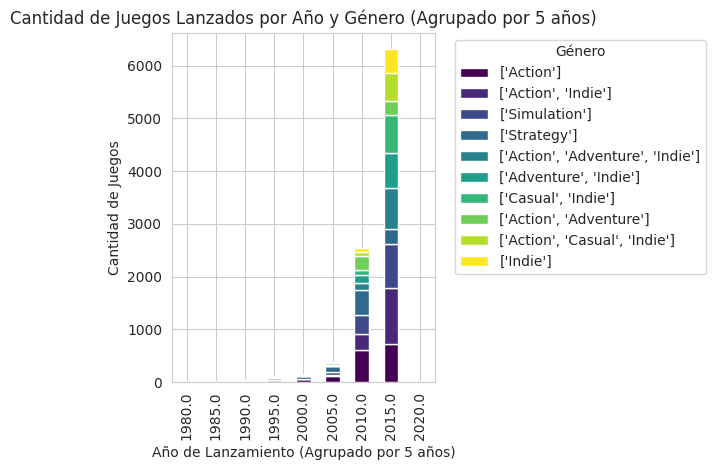

In [54]:
# Crear un DataFrame con la cantidad de juegos lanzados por año y género
df2['release_year'] = pd.to_datetime(df2['release_date'], errors='coerce').dt.year
genre_year_counts = df2.groupby(['release_year', 'genres']).size().unstack(fill_value=0)

# Agrupar los datos por intervalos de 5 años
genre_year_counts = genre_year_counts.groupby((genre_year_counts.index // 5) * 5).sum()

# Seleccionar algunos géneros principales
top_genres = genre_year_counts.sum().nlargest(10).index
genre_year_counts = genre_year_counts[top_genres]

# Crear un gráfico de barras apiladas
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
genre_year_counts.plot(kind='bar', stacked=True, cmap='viridis')
plt.title('Cantidad de Juegos Lanzados por Año y Género (Agrupado por 5 años)')
plt.xlabel('Año de Lanzamiento (Agrupado por 5 años)')
plt.ylabel('Cantidad de Juegos')
plt.legend(title='Género', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



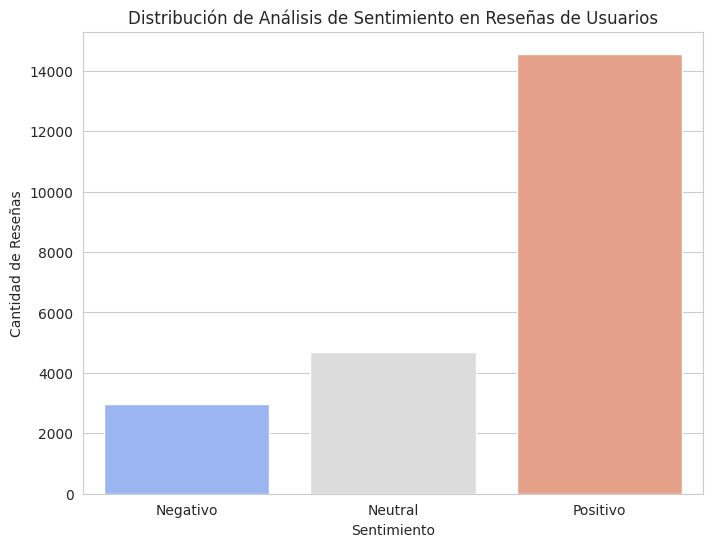

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un gráfico de barras que muestra la distribución de análisis de sentimiento
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
sns.countplot(data=df1, x='sentiment_analysis', palette='coolwarm')
plt.title('Distribución de Análisis de Sentimiento en Reseñas de Usuarios')
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad de Reseñas')
plt.xticks([0, 1, 2], ['Negativo', 'Neutral', 'Positivo'])
plt.show()



<Figure size 1200x800 with 0 Axes>

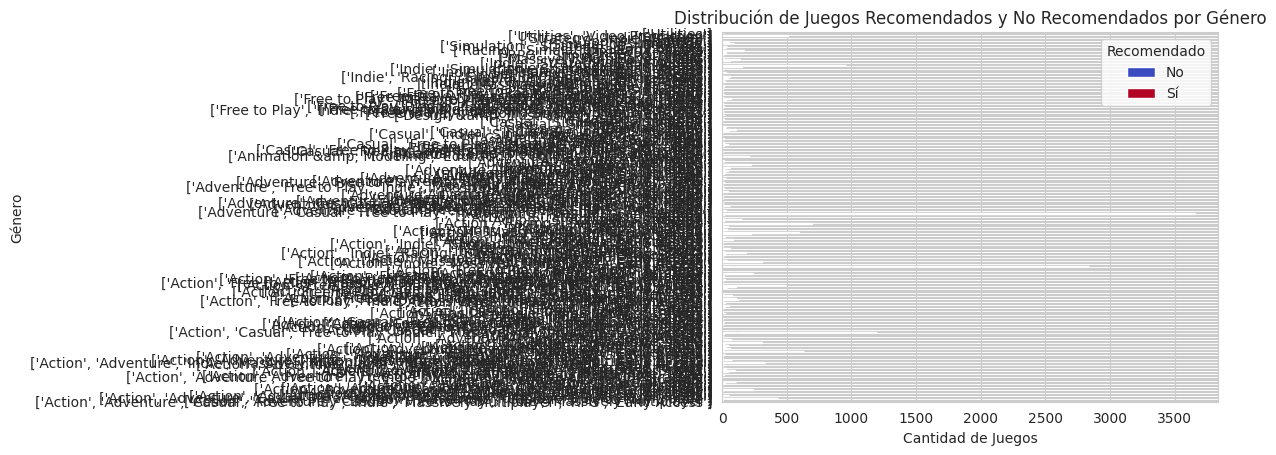

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponiendo que tienes df1_columns y df2_columns definidos previamente
# También suponiendo que deseas fusionar estos DataFrames en uno solo
combined_df = pd.merge(df1, df2_columns, on='item_id', how='inner')

# Crear un DataFrame que contiene la cantidad de juegos recomendados y no recomendados por género
genre_recommendation_counts = combined_df.groupby(['genres', 'recommend']).size().unstack(fill_value=0)

# Crear un gráfico de barras apiladas horizontal
plt.figure(figsize=(12, 8))  # Aumentamos el alto para mostrar etiquetas largas
sns.set_style("whitegrid")
genre_recommendation_counts.plot(kind='barh', stacked=True, colormap='coolwarm')
plt.title('Distribución de Juegos Recomendados y No Recomendados por Género')
plt.ylabel('Género')
plt.xlabel('Cantidad de Juegos')
plt.legend(title='Recomendado', labels=['No', 'Sí'])
plt.show()



<Figure size 1200x600 with 0 Axes>

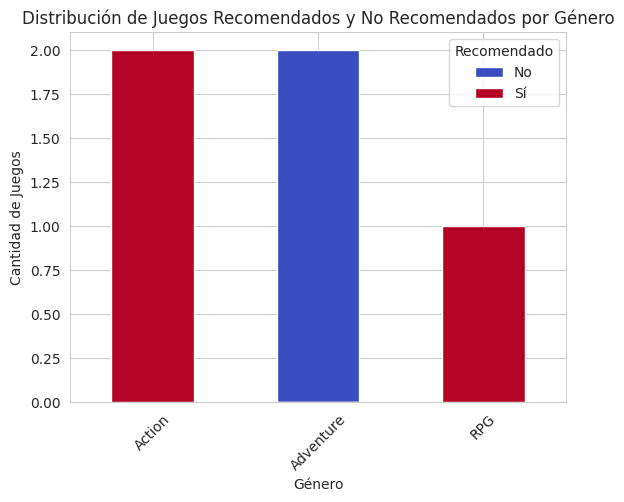

In [77]:
# Crear un DataFrame ficticio con datos similares
data = {
    'genres': ['Action', 'Adventure', 'RPG', 'Action', 'Adventure'],
    'recommend': [True, False, True, True, False]
}

df = pd.DataFrame(data)

# Calcular la cantidad de juegos recomendados y no recomendados por género
genre_recommendation_counts = df.groupby(['genres', 'recommend']).size().unstack(fill_value=0)

# Crear un gráfico de barras apiladas
plt.figure(figsize=(12, 6))
genre_recommendation_counts.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Distribución de Juegos Recomendados y No Recomendados por Género')
plt.xlabel('Género')
plt.ylabel('Cantidad de Juegos')
plt.xticks(rotation=45)
plt.legend(title='Recomendado', labels=['No', 'Sí'])
plt.show()
